In [69]:
# imports all librabies 

import numpy as np 
import pandas as pd 
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



with open('cab_rides.csv/rideshare_kaggle.csv', mode='r') as file:

    csv_reader = csv.reader(file)

    next (csv_reader, None)

In [70]:
# called main DataFrame

data_frame = pd.read_csv('cab_rides.csv/rideshare_kaggle.csv')
data_frame.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [71]:
# define all Sub Frames
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

# Count rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)


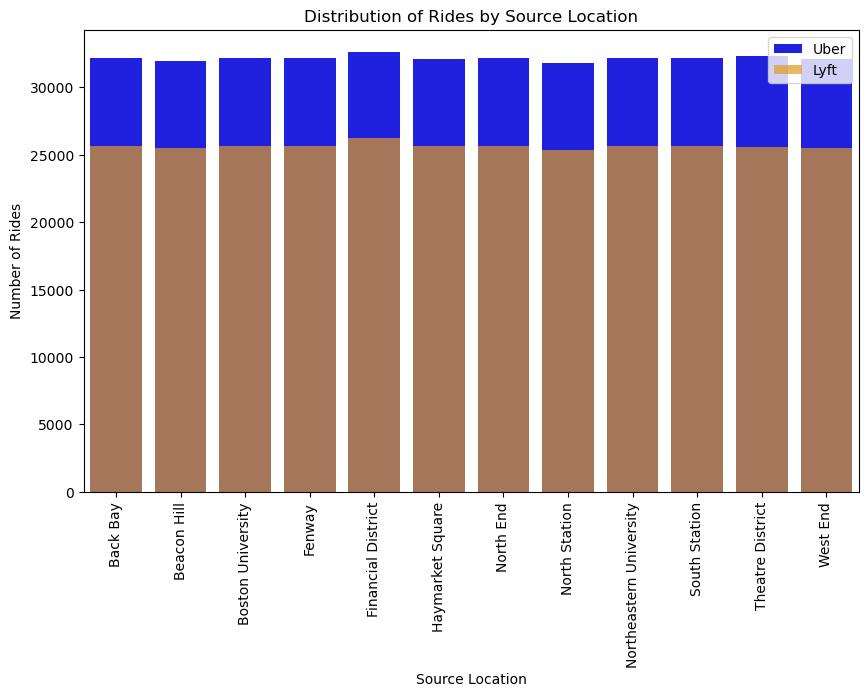

In [72]:
#Distribution of Rides by Source Location

#  Count rides by source location for both Uber and Lyft
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by source location
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Rahul Code Contribution

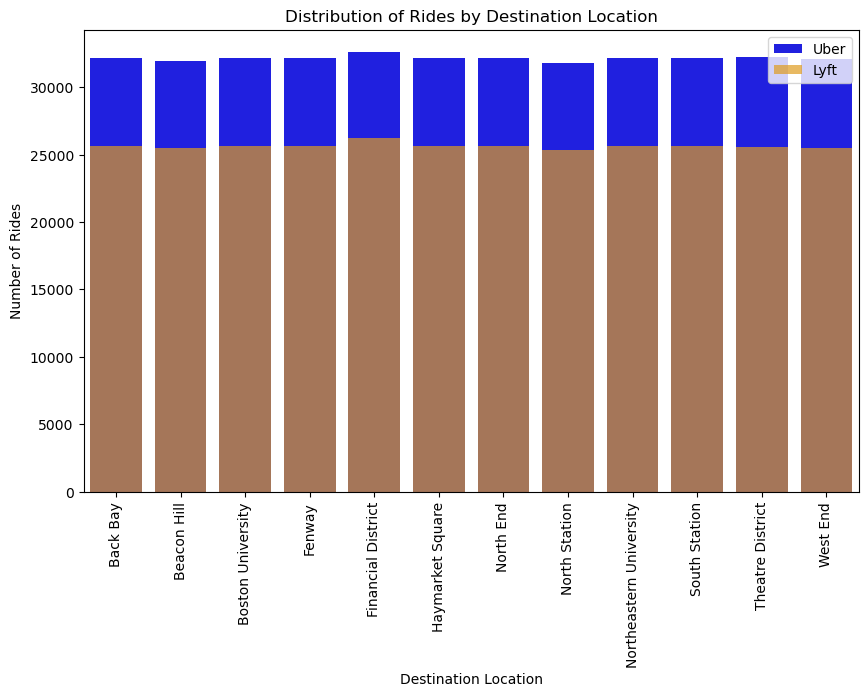

In [73]:
#Distribution of Rides by Destination Location'
# Count rides by destination location for both Uber and Lyft
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by destination location
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

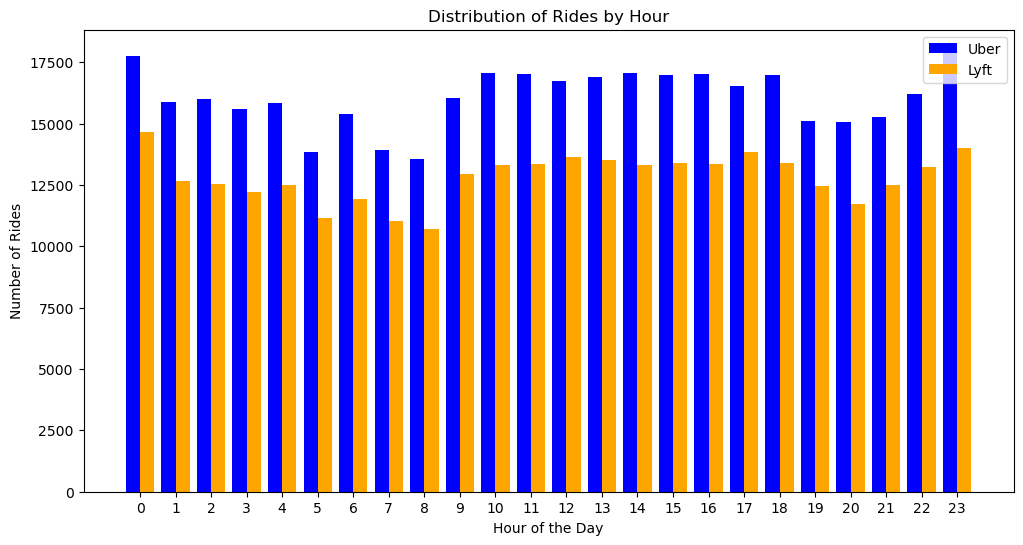

In [74]:
#'Distribution of Rides by Hour

# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

# Count rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by hour
plt.figure(figsize=(12, 6))

# Calculate width of each bar
bar_width = 0.4

# Calculate the x positions for each bar group
r1 = hourly_counts.index - bar_width / 2
r2 = hourly_counts.index + bar_width / 2

# Plotting Uber rides
plt.bar(r1, hourly_counts['Uber'], width=bar_width, label='Uber', color='blue')

# Plotting Lyft rides
plt.bar(r2, hourly_counts['Lyft'], width=bar_width, label='Lyft', color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.xticks(hourly_counts.index)
plt.legend()
plt.show()

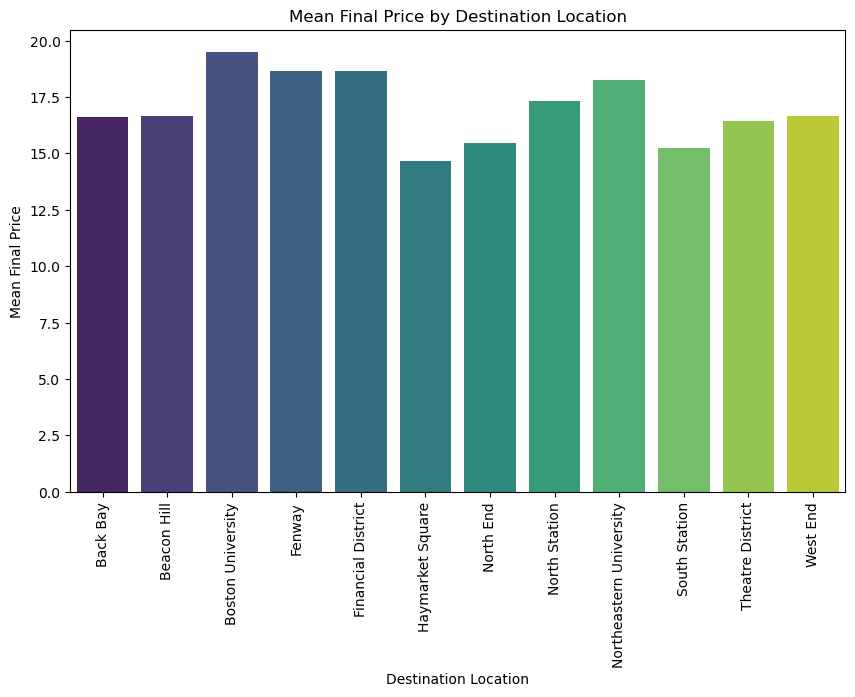

In [76]:
#Mean Final Price by Destination Location')



# Calculate final price
price = np.array(data_frame['price'])
surge_multiplier = np.array(data_frame['surge_multiplier'])
final_price = price * surge_multiplier

# Add final price to the data frame
data_frame['final_price'] = final_price

# Group by destination and calculate mean final price
mean_final_price = data_frame.groupby('destination')['final_price'].mean()

# Create a bar plot to visualize the mean final price by destination location
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_final_price.index, y=mean_final_price.values, palette='viridis')

plt.xlabel('Destination Location')
plt.ylabel('Mean Final Price')
plt.title('Mean Final Price by Destination Location')
plt.xticks(rotation=90)
plt.show()


c:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

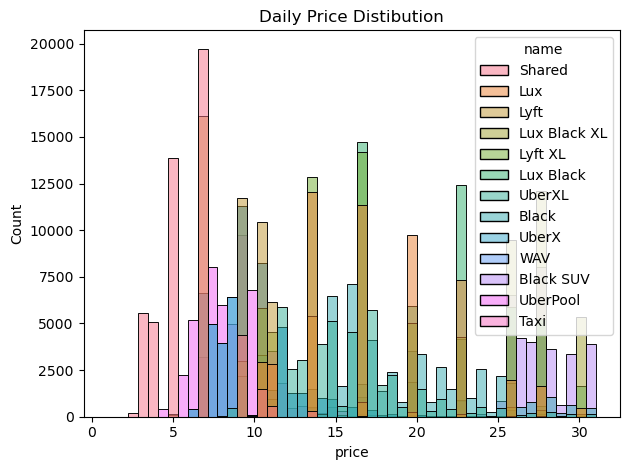

In [77]:
sns.histplot(x='price',data=data_frame, bins = np.linspace(1,31), hue='name')
plt.title("Daily Price Distibution")
plt.tight_layout()
plt.show()

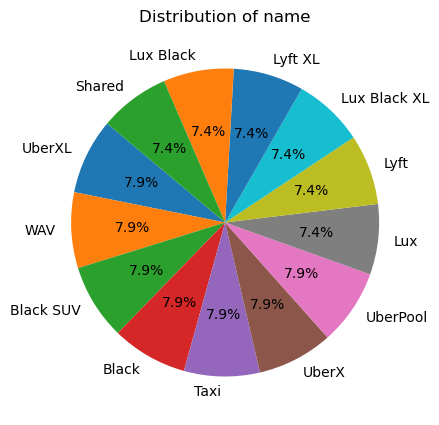

In [78]:

def pie_chart(data_frame, columns):
    # Aggregate the data by the specified columns
    data_counts = data_frame[columns[0]].value_counts()
    
    # Create a smaller pie chart
    plt.figure(figsize=(5, 5))  # Adjust figure size to make it smaller
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    
    # Set the title
    plt.title(f'Distribution of {columns[0]}')
    
    # Display the pie chart
    plt.show()

# Example usage
columns = ['name']
pie_chart(data_frame, columns)

# Siawash Code Contribution 

### Setting my file location

In [44]:
# called main DataFrame
# I had issues accessing CSV file with relative path so I have to use full path 
data_frame = pd.read_csv('cab_rides.csv/rideshare_kaggle.csv')


In [45]:
# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')
data_frame

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000105,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.677000046,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999954,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000072,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.223000050,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [79]:
data_frame.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [80]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  datetime64[ns]
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  object        
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [81]:
reduced_data_frame = pd.DataFrame(data_frame[["timestamp", 'hour', 'day', 'month',
                                            "price", "short_summary", "distance"]])
reduced_data_frame.head()

,timestamp,hour,day,month,price,short_summary,distance
0,2018-12-16 09:30:07.890000105,9,16,12,5.0,Mostly Cloudy,0.44
1,2018-11-27 02:00:23.677000046,2,27,11,11.0,Rain,0.44
2,2018-11-28 01:00:22.197999954,1,28,11,7.0,Clear,0.44
3,2018-11-30 04:53:02.749000072,4,30,11,26.0,Clear,0.44
4,2018-11-29 03:49:20.223000050,3,29,11,9.0,Partly Cloudy,0.44


### Cleaning Up Dataframe

# Check columns for null or missing values
reduced_data_frame.isna().sum()

In [82]:
# Removing missing or NaN values

dropna_reduced_df = reduced_data_frame.dropna(how= 'any')
dropna_reduced_df

,timestamp,hour,day,month,price,short_summary,distance
0,2018-12-16 09:30:07.890000105,9,16,12,5.0,Mostly Cloudy,0.44
1,2018-11-27 02:00:23.677000046,2,27,11,11.0,Rain,0.44
2,2018-11-28 01:00:22.197999954,1,28,11,7.0,Clear,0.44
3,2018-11-30 04:53:02.749000072,4,30,11,26.0,Clear,0.44
4,2018-11-29 03:49:20.223000050,3,29,11,9.0,Partly Cloudy,0.44
...,...,...,...,...,...,...,...
693065,2018-12-01 23:53:06.000000000,23,1,12,9.5,Partly Cloudy,1.00
693066,2018-12-01 23:53:06.000000000,23,1,12,13.0,Partly Cloudy,1.00
693067,2018-12-01 23:53:06.000000000,23,1,12,9.5,Partly Cloudy,1.00
693069,2018-12-01 23:53:06.000000000,23,1,12,27.0,Partly Cloudy,1.00


### Data Analysis

In [83]:
# Total counts for weather conditions
counts_df = dropna_reduced_df['short_summary'].value_counts()
counts_df

short_summary
Overcast             201429
Mostly Cloudy        134603
Partly Cloudy        117226
Clear                 80256
Light Rain            50488
Rain                  21781
Possible Drizzle      17176
Foggy                  8292
Drizzle                6725
Name: count, dtype: int64

In [84]:
# Mean Price grouped by weather and hour
weather_price_df = reduced_data_frame[["short_summary", "hour", "price", "month", "distance"]]
avg_price_by_weather = weather_price_df.groupby(['short_summary', 'hour']).mean()
avg_price_by_weather

price      month  distance
short_summary hour                                
Clear         0     16.485635  11.481996  2.148973
              1     16.575006  11.433333  2.204502
              2     16.393205  11.478261  2.202575
              3     16.435062  11.626049  2.223712
              4     16.476190  11.665834  2.176332
...                       ...        ...       ...
Rain          1     16.340629  11.352941  2.141914
              2     16.522064  11.000000  2.203388
              3     16.718379  11.000000  2.220897
              4     16.444908  11.000000  2.116356
              5     16.610060  11.000000  2.210965

[133 rows x 3 columns]

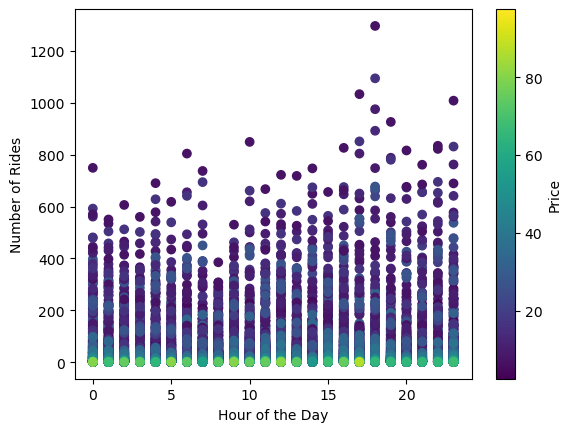

In [85]:
price_rides_weather = dropna_reduced_df.groupby(['hour', 'short_summary', 'price']).size().reset_index(name='numb_rides')
plt.scatter(price_rides_weather['hour'], price_rides_weather['numb_rides'], c=price_rides_weather['price'])
clb = plt.colorbar()
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
clb.set_label("Price")
plt.show()

In [86]:
from scipy.stats import pearsonr

correlation_rides_hour = pearsonr(price_rides_weather['hour'], price_rides_weather['numb_rides'])
print(f"The Pearson correlation coefficient between hour and number of rides is {round(correlation_rides_hour[0], 2)}")


The Pearson correlation coefficient between hour and number of rides is 0.05


In [88]:
price_rides_weather
rides_per_hour_weather = dropna_reduced_df.groupby(['hour', 'short_summary']).size().reset_index(name='numb_rides')
rides_per_hour_weather

,hour,short_summary,numb_rides
0,0,Clear,8876
1,0,Mostly Cloudy,5182
2,0,Overcast,6905
3,0,Partly Cloudy,3459
4,0,Rain,5450
...,...,...,...
128,23,Clear,3256
129,23,Light Rain,4580
130,23,Mostly Cloudy,1711
131,23,Overcast,11740


In [90]:
#Checking sum of rides based on hour
total_rides_by_hour = rides_per_hour_weather.groupby(['hour']).sum()
total_rides_by_hour

,short_summary,numb_rides
hour,,
0,Clear Mostly Cloudy Overcast Partly Cloudy...,29872
1,Clear Mostly Cloudy Overcast Partly Cloudy...,26310
2,Clear Light Rain Mostly Cloudy Overcast P...,26323
3,Clear Foggy Light Rain Mostly Cloudy Over...,25530
4,Clear Light Rain Mostly Cloudy Overcast R...,26125
5,Clear Drizzle Foggy Mostly Cloudy Overcas...,22995
6,Clear Foggy Light Rain Mostly Cloudy Over...,25147
7,Clear Drizzle Light Rain Mostly Cloudy Ov...,22930
8,Clear Foggy Light Rain Mostly Cloudy Over...,22337


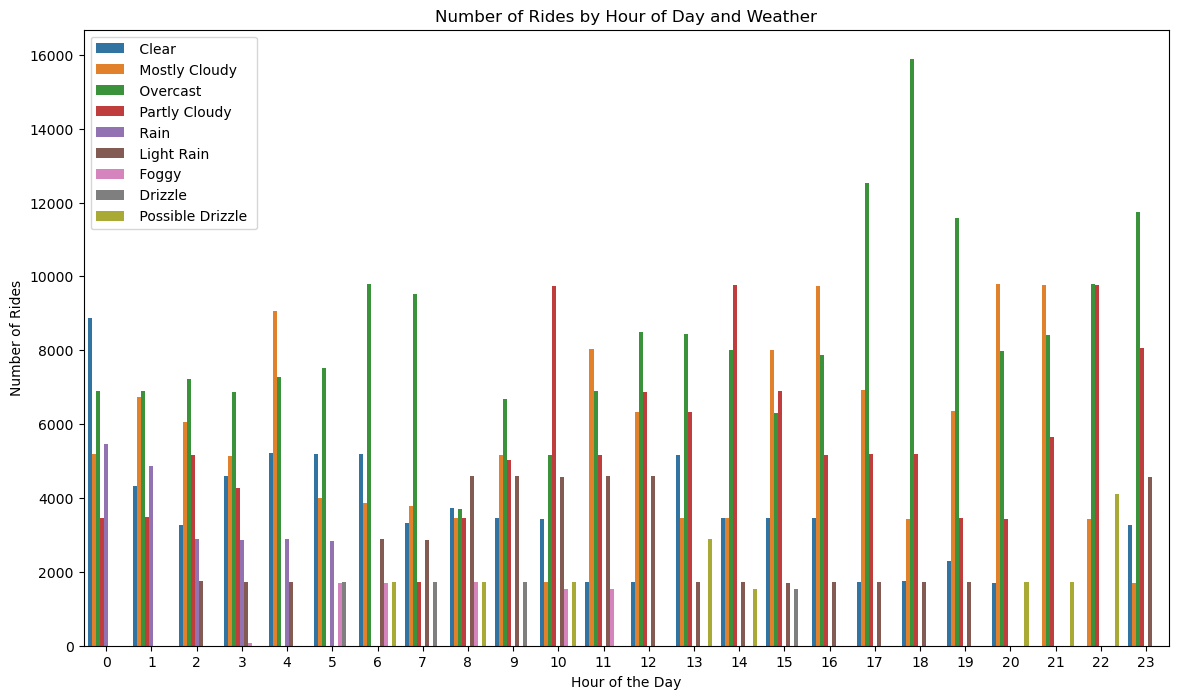

In [91]:
rides_per_hour_weather = dropna_reduced_df.groupby(['hour', 'short_summary']).size().reset_index(name='num_rides')

plt.figure(figsize=(14,8))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.barplot(x='hour', y='num_rides', hue='short_summary', data=rides_per_hour_weather)

plt.title("Number of Rides by Hour of Day and Weather")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.legend(title= "Weather")
plt.xticks(range(24))
plt.legend(loc='upper left')

#plt.xticks(["16", "18"])

plt.show()

In [92]:
# Check min and max values for price
print(dropna_reduced_df["price"].max())
print(dropna_reduced_df["price"].min())

97.5
2.5


In [94]:
avgprice_weather = dropna_reduced_df.groupby(['short_summary']).mean()
avgprice_weather


,timestamp,hour,day,month,price,distance
short_summary,,,,,,
Clear,2018-12-07 05:38:57.156784640,8.670878,19.917227,11.564556,16.486460,2.185388
Drizzle,2018-12-12 13:44:35.093340416,8.836729,19.063643,11.770706,16.501784,2.175958
Foggy,2018-11-30 16:25:19.631959552,7.851664,11.753980,11.619392,16.540883,2.161761
Light Rain,2018-12-02 16:43:54.555692544,11.492909,15.831901,11.545536,16.561282,2.193693
Mostly Cloudy,2018-12-05 04:25:12.992305920,11.745392,17.819625,11.561823,16.594419,2.194945
Overcast,2018-12-07 06:11:05.665692416,12.589334,17.217685,11.649842,16.535116,2.186401
Partly Cloudy,2018-12-06 00:51:05.068766720,13.544777,17.348216,11.603407,16.552009,2.191447
Possible Drizzle,2018-12-04 20:38:09.220156160,15.258908,16.114870,11.602934,16.481390,2.194799
Rain,2018-11-30 05:58:40.402381056,2.064001,25.428447,11.157155,16.539987,2.183036


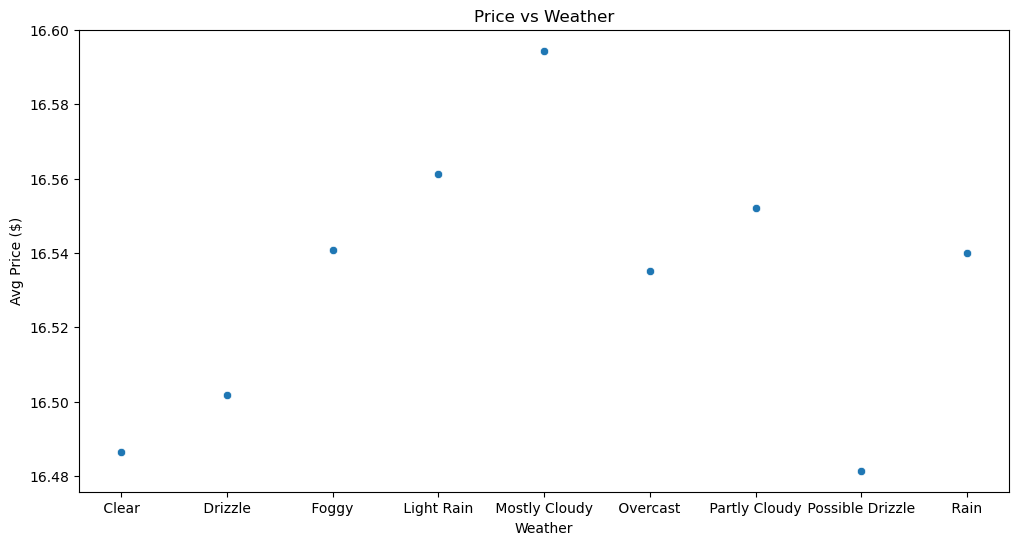

In [95]:
plt.figure(figsize=(12,6))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.scatterplot(x='short_summary', y='price', data=avgprice_weather)

plt.title("Price vs Weather")
plt.xlabel("Weather")
plt.ylabel("Avg Price ($)")
plt.show()

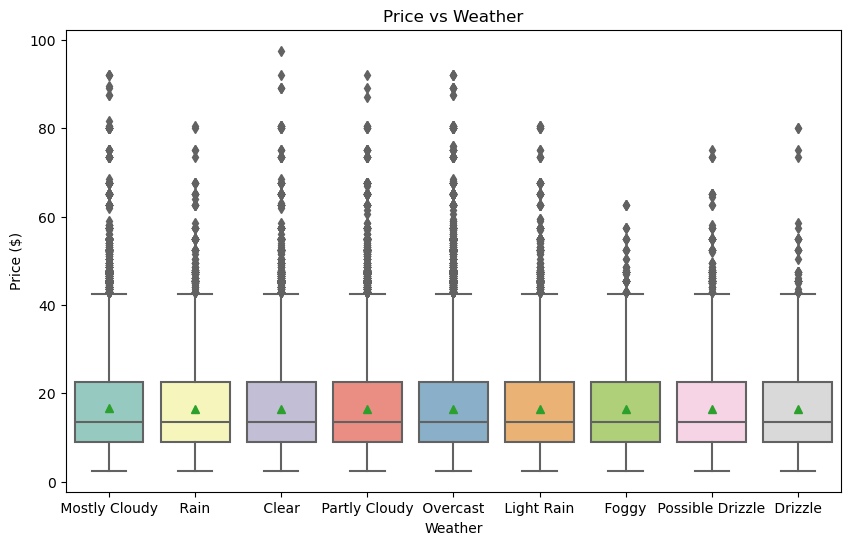

In [96]:
plt.figure(figsize=(10,6))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.boxplot(x='short_summary', y='price', data=dropna_reduced_df, palette='Set3', showmeans=True)

plt.title("Price vs Weather")
plt.xlabel("Weather")
plt.ylabel("Price ($)")


plt.show()

In [ ]:
#This box plot shows that the data is not normally distributed because it shows
# most of the data lies closer to the lower whisker
#triangle shows the mean; the line in the middle is the median; 
#top of the box is the upper quartile, lower line of the box shows the lower quartile

In [97]:
hour_comparison_df = dropna_reduced_df[["hour", "price", "short_summary"]]
hour_comparison_df
gb_hour_comparison = hour_comparison_df.groupby(["hour"]).sum()
gb_hour_comparison

,price,short_summary
hour,,
0,495121.50,Overcast Overcast Partly Cloudy Overcast ...
1,434477.50,Clear Rain Clear Clear Rain Clear Mostl...
2,435956.35,Rain Clear Rain Partly Cloudy Rain Mostl...
3,422259.00,Partly Cloudy Clear Rain Overcast Overcas...
4,433134.50,Clear Mostly Cloudy Mostly Cloudy Mostly C...
5,380273.30,Overcast Clear Overcast Overcast Overcast...
6,415411.50,Foggy Clear Overcast Mostly Cloudy Clear ...
7,378153.00,Overcast Overcast Mostly Cloudy Overcast ...
8,370868.50,Possible Drizzle Clear Light Rain Mostly C...


In [62]:
# Check min and max values for price
print(dropna_reduced_df["price"].max())
print(dropna_reduced_df["price"].min())

97.5
2.5


In [67]:
hour_comparison_df = dropna_reduced_df[["hour", "price", "short_summary"]]
hour_comparison_df
gb_hour_comparison = hour_comparison_df.groupby(["hour"]).sum()
gb_hour_comparison

,price,short_summary
hour,,
0,495121.50,Overcast Overcast Partly Cloudy Overcast ...
1,434477.50,Clear Rain Clear Clear Rain Clear Mostl...
2,435956.35,Rain Clear Rain Partly Cloudy Rain Mostl...
3,422259.00,Partly Cloudy Clear Rain Overcast Overcas...
4,433134.50,Clear Mostly Cloudy Mostly Cloudy Mostly C...
5,380273.30,Overcast Clear Overcast Overcast Overcast...
6,415411.50,Foggy Clear Overcast Mostly Cloudy Clear ...
7,378153.00,Overcast Overcast Mostly Cloudy Overcast ...
8,370868.50,Possible Drizzle Clear Light Rain Mostly C...


# Tianyi Code Contribution

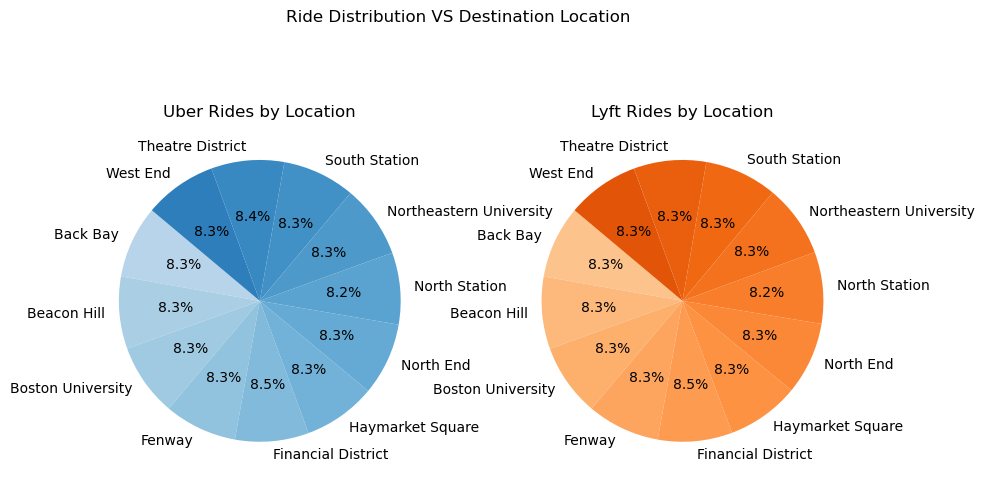

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Count rides by destination location for both Uber and Lyft
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Sum all Uber and Lyft rides across all locations
total_counts = destination_counts.sum()

# Calculate the proportion of each location within Uber and Lyft
uber_proportions = destination_counts['Uber'] / total_counts['Uber']
lyft_proportions = destination_counts['Lyft'] / total_counts['Lyft']

# Create a figure
plt.figure(figsize=(10, 6))

# Pie chart for Uber
plt.subplot(1, 2, 1)
plt.pie(uber_proportions,
        labels=destination_counts.index,
        colors=plt.cm.Blues(np.linspace(0.3, 0.7, len(uber_proportions))),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Uber Rides by Location')

# Pie chart for Lyft
plt.subplot(1, 2, 2)
plt.pie(lyft_proportions,
        labels=destination_counts.index,
        colors=plt.cm.Oranges(np.linspace(0.3, 0.7, len(lyft_proportions))),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Lyft Rides by Location')

plt.suptitle('Ride Distribution VS Destination Location')
plt.show()

# Sukhwinder Code Contribution

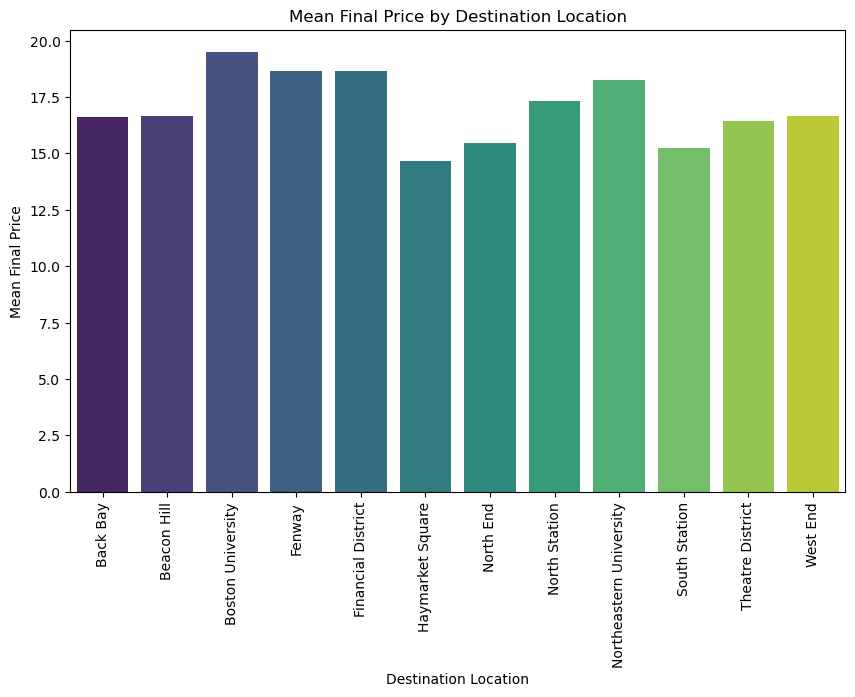

In [99]:
#Mean Final Price by Destination Location')



# Calculate final price
price = np.array(data_frame['price'])
surge_multiplier = np.array(data_frame['surge_multiplier'])
final_price = price * surge_multiplier

# Add final price to the data frame
data_frame['final_price'] = final_price

# Group by destination and calculate mean final price
mean_final_price = data_frame.groupby('destination')['final_price'].mean()

# Create a bar plot to visualize the mean final price by destination location
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_final_price.index, y=mean_final_price.values, palette='viridis')

plt.xlabel('Destination Location')
plt.ylabel('Mean Final Price')
plt.title('Mean Final Price by Destination Location')
plt.xticks(rotation=90)
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_35560\1055026376.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=mean_final_price.index, y=mean_final_price.values, palette='viridis')


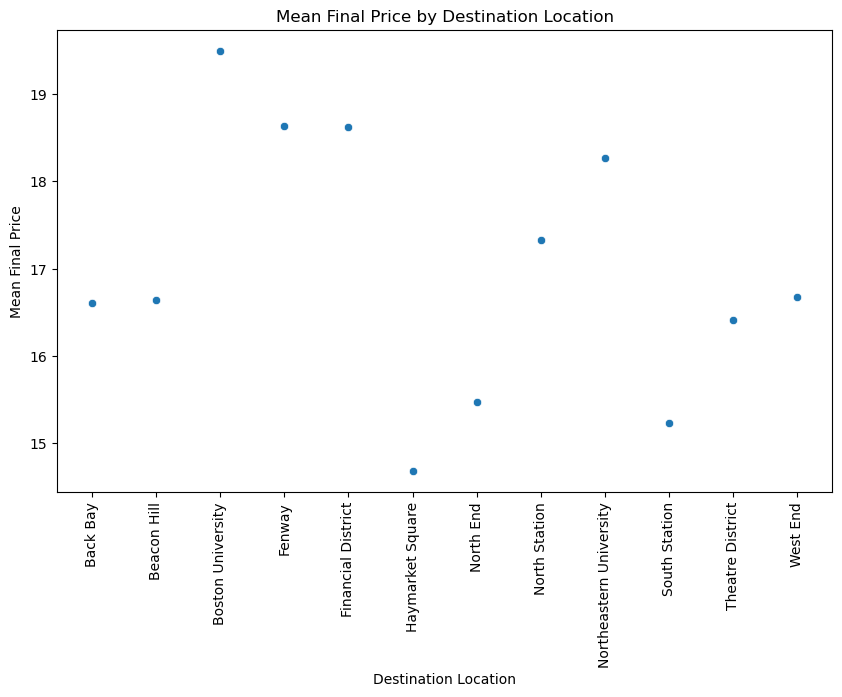

In [56]:
#Mean Final Price by Destination Location')



# Calculate final price
price = np.array(data_frame['price'])
surge_multiplier = np.array(data_frame['surge_multiplier'])
final_price = price * surge_multiplier

# Add final price to the data frame
data_frame['final_price'] = final_price

# Group by destination and calculate mean final price
mean_final_price = data_frame.groupby('destination')['final_price'].mean()

# Create a bar plot to visualize the mean final price by destination location
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mean_final_price.index, y=mean_final_price.values, palette='viridis')

plt.xlabel('Destination Location')
plt.ylabel('Mean Final Price')
plt.title('Mean Final Price by Destination Location')
plt.xticks(rotation=90)
plt.show()